In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import AlgoLoop
import StatisticFunc

plt.style.use('Solarize_Light2')                     # 绘图风格
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 字体雅黑
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False    # 处理负号

# 预处理（剔除原油，铜，铁矿石）

## 提取并处理数据

### 权益类资产换手率

In [21]:
Turnovers = pd.read_excel(io="Raw/资产换手率.xlsx")                      # 读取数据
Turnovers = Turnovers.drop([0], axis=0)                                   # 删除多余行
Turnovers["日期"] = pd.DatetimeIndex(Turnovers["日期"])                    # 类型转换
Turnovers = Turnovers.set_index("日期")                                   # 设置索引

In [22]:
Turnovers

,沪深300,中证500
日期,,
2008-01-02,1.7647,3.2512
2008-01-03,2.4975,3.972
2008-01-04,1.9958,3.151
2008-01-07,2.0514,3.8154
2008-01-08,2.4888,4.009
...,...,...
2020-06-19,0.5557,1.5581
2020-06-22,0.566,1.5956
2020-06-23,0.4694,1.3799


### GC007利率

In [16]:
Rates = pd.read_excel(io="Raw/GC007利率.xlsx")           #  读取数据
Rates = Rates.drop([0, 1, 2], axis=0)                   # 删除多余行
Rates.columns = ['日期', 'GC007']                        # 修改列名
Rates["日期"] = pd.DatetimeIndex(Rates["日期"])           # 类型转换
Rates = Rates.set_index("日期")                          # 设置索引

In [18]:
Rates

,GC007
日期,
2008-01-02,3
2008-01-03,2.815
2008-01-04,2.85
2008-01-07,2.7
2008-01-08,2
...,...
2020-06-19,2.87
2020-06-22,3.135
2020-06-23,3.015


### 美元汇率

In [42]:
FXRates = pd.read_excel(io="Raw/美元汇率.xlsx")
FXRates = FXRates.drop([0, 1, 2], axis=0)
FXRates.columns = ['日期', '美元汇率']                        
FXRates["日期"] = pd.DatetimeIndex(FXRates["日期"])
FXRates = FXRates.set_index("日期")

In [43]:
FXRates

,美元汇率
日期,
2008-01-02,0
2008-01-03,7.2725
2008-01-04,7.2725
2008-01-07,7.269
2008-01-08,7.2643
...,...
2020-07-03,7.068
2020-07-06,7.033
2020-07-07,7.0241


### 各资产收盘价

In [40]:
Assets = pd.read_excel(io="Raw/资产收盘价.xlsx")
Assets = Assets.drop([0], axis=0)                                   # 删除多余行
Assets["日期"] = pd.DatetimeIndex(Assets["日期"])                    # 类型转换
Assets = Assets.set_index("日期")                                   # 设置索引

In [41]:
Assets.tail()

,沪深300,中证500,上证10年国债,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,中信证券铁矿石,标普500
日期,,,,,,,,,
2020-07-06,4670.09,6299.86,147.4,200.154,5335.92,15760.9,758.982,2458.91,3179.72
2020-07-07,4698.13,6380.03,147.162,199.612,5352.32,15825.6,755.005,2514.87,3145.32
2020-07-08,4774,6535.42,146.825,199.579,5396.07,15895.8,759.096,2570.83,3169.94
2020-07-09,4840.77,6693.75,146.231,198.999,5414.36,15721.7,734.336,2603.75,3152.05
2020-07-10,4753.13,6676.44,146.231,198.999,5403.39,15689.9,732.848,2603.75,3152.05


### 十年国债&美债收益率

In [44]:
CNRates = pd.read_excel(io="Raw/中债国债到期收益率(中债)(日).xls")        # 读取数据
CNRates.columns = ['日期', '十年国债收益率']                             # 修改列名
CNRates = CNRates.drop([0, 3870, 3871], axis=0)                       # 删除多余行
CNRates["日期"] = pd.DatetimeIndex(CNRates["日期"])                    # 类型转换
CNRates = CNRates.set_index("日期")                                   # 设置索引

In [45]:
USRates = pd.read_excel(io="Raw/美债收益率.xlsx")                       # 读取数据
USRates.columns = ['日期', '十年美债收益率']                             # 修改列名
USRates = USRates.drop([0, 6263, 6264], axis=0)                       # 删除多余行
USRates["日期"] = pd.DatetimeIndex(USRates["日期"])                    # 类型转换
USRates = USRates.set_index("日期")                                    # 设置索引

### 十年国债&美债价格指数

In [46]:
Data = Assets.merge(Rates, how='left', left_index=True, right_index=True)
Data = Data.merge(CNRates, how='left', left_index=True, right_index=True)
Data = Data.merge(USRates, how='left', left_index=True, right_index=True)
Data = Data.merge(FXRates, how='left', left_index=True, right_index=True)

In [47]:
Data['持有时长'] = (Data.index - Data.index[0]).days

# 计算十年国债
Data['10年国债价格指数'] = 100 - (Data['十年国债收益率'] - 3.0) * 8.2 + 3.0 * Data['持有时长'] / 365.0
Data['10年国债价格指数'] = Data['10年国债价格指数'].fillna(method='ffill')

#计算十年美债
Data['10年美债价格指数'] = 100 - (Data['十年美债收益率'] - 3.0) * 8.2 + 3.0 * Data['持有时长'] / 365.0
Data['10年美债价格指数'] = Data['10年美债价格指数'].fillna(method='ffill')

In [48]:
# 利用自制10年国债价格指数，替换上证10年国债
Assets['中国10年国债'] = Data['10年国债价格指数'].values
Assets['美国10年国债'] = Data['10年美债价格指数'].values
Assets = Assets.drop('上证10年国债', axis=1)

In [49]:
Data

,沪深300,中证500,上证10年国债,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,中信证券铁矿石,标普500,GC007,十年国债收益率,十年美债收益率,美元汇率,持有时长,10年国债价格指数,10年美债价格指数
日期,,,,,,,,,,,,,,,,
2008-01-02,5385.1,5123.93,NaN,99.689,7657.43,9302.4,10694.4,NaN,1447.16,3,4.4363,3.91,0,0,88.222340,92.538000
2008-01-03,5422.03,5230.75,NaN,99.529,7943.2,9372.37,10614.9,NaN,1447.16,2.815,4.4263,3.91,7.2725,1,88.312559,92.546219
2008-01-04,5483.65,5243.03,NaN,99.568,7867.64,9336.21,10479.6,NaN,1411.63,2.85,4.4013,3.88,7.2725,2,88.525778,92.800438
2008-01-07,5556.59,5347.81,NaN,99.585,7817.5,9285.58,10166,NaN,1416.18,2.7,4.3948,3.86,7.269,5,88.603736,92.989096
2008-01-08,5528.05,5200.55,NaN,99.448,8220.33,9495.24,10312.2,NaN,1390.19,2,4.4024,3.86,7.2643,6,88.549635,92.997315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-06,4670.09,6299.86,147.4,200.154,5335.92,15760.9,758.982,2458.91,3179.72,NaN,NaN,0.69,7.033,4569,138.591315,156.495425
2020-07-07,4698.13,6380.03,147.162,199.612,5352.32,15825.6,755.005,2514.87,3145.32,NaN,NaN,0.65,7.0241,4570,138.591315,156.831644
2020-07-08,4774,6535.42,146.825,199.579,5396.07,15895.8,759.096,2570.83,3169.94,NaN,NaN,0.67,7.0176,4571,138.591315,156.675863


In [55]:
# 皮尔逊相关系数
np.corrcoef(Data['美元汇率'][1:-1].values.astype(np.float32), Data['10年国债价格指数'][1:-1].values.astype(np.float32))

array([[1.        , 0.15664038],
       [0.15664038, 1.        ]])

## 计算各资产收益率

In [50]:
# 去掉没有10年国债数据的日期
Assets = Assets[:-10]

In [52]:
Assets

,沪深300,中证500,信用债3-5AAA,中信证券COMEX铜期货,中信证券COMEX黄金期货,中信证券WTI原油期货,中信证券铁矿石,标普500,中国10年国债,美国10年国债
日期,,,,,,,,,,
2008-01-02,5385.1,5123.93,99.689,7657.43,9302.4,10694.4,NaN,1447.16,88.222340,92.538000
2008-01-03,5422.03,5230.75,99.529,7943.2,9372.37,10614.9,NaN,1447.16,88.312559,92.546219
2008-01-04,5483.65,5243.03,99.568,7867.64,9336.21,10479.6,NaN,1411.63,88.525778,92.800438
2008-01-07,5556.59,5347.81,99.585,7817.5,9285.58,10166,NaN,1416.18,88.603736,92.989096
2008-01-08,5528.05,5200.55,99.448,8220.33,9495.24,10312.2,NaN,1390.19,88.549635,92.997315
...,...,...,...,...,...,...,...,...,...,...
2020-06-18,4044.38,5734.4,200.604,5037.57,15264.2,731.945,2524.75,3115.34,138.613339,156.183479
2020-06-19,4098.71,5787.15,200.598,5072.06,15459.5,746.671,2536.27,3097.74,138.437059,156.273699
2020-06-22,4102.05,5784.03,200.394,5135.16,15567.2,763.025,2500.06,3117.86,138.132896,156.216356


### 日内损益

- 去除WTI原油期货
- 去除COMEX铜期货
- 去除铁矿石期货

In [14]:
Returns = Assets.pct_change(axis=0)
Returns = Returns.dropna(axis=0, how='all')           # 删除无数据日

In [15]:
Returns = Returns.drop('中信证券WTI原油期货', axis=1)
Returns = Returns.drop('中信证券COMEX铜期货', axis=1)
Returns = Returns.drop('中信证券铁矿石', axis=1)

### 累计损益

In [16]:
cumReturns = (1.0 + Returns)
cumReturns = cumReturns.fillna(1.0)                    # 填充空值
cumReturns = cumReturns.cumprod()                      # 计算各资产累计收益率

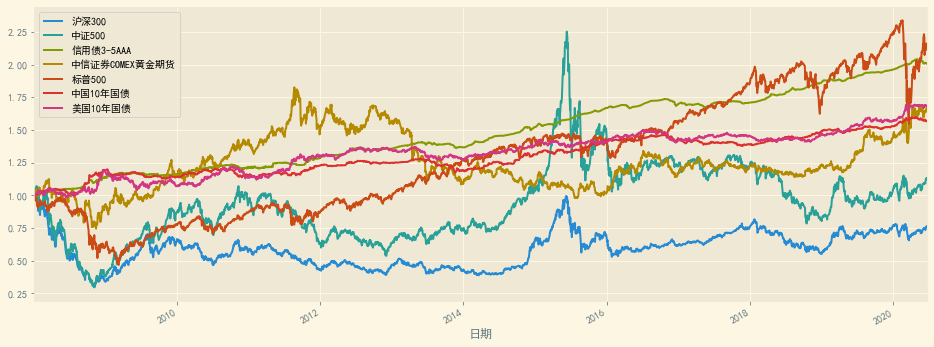

In [69]:
cumReturns.plot(figsize=(16, 6))

### 杠杆调整后的债券净值

In [18]:
lever = 2.0                                 # 杠杆
leverReturns = Returns.copy()               # 创建副本 
leverCumReturns = cumReturns.copy()   

# 更新杠杆调整后的债券净值
leverReturns.loc[:, ['中国10年国债', '信用债3-5AAA']] = Returns.loc[:, ['中国10年国债', '信用债3-5AAA']] * (1.0 + lever) - Rates.values * lever / (365.0 * 100)

# 更新累计净值
leverCumReturns = (1.0 + leverReturns)
leverCumReturns = leverCumReturns.fillna(1.0)                    # 填充空值
leverCumReturns = leverCumReturns.cumprod()                      # 计算各资产累计收益率

In [19]:
leverCumReturns.tail()

,沪深300,中证500,信用债3-5AAA,中信证券COMEX黄金期货,标普500,中国10年国债,美国10年国债
日期,,,,,,,
2020-06-18,0.751032,1.119141,4.942358,1.640893,2.152727,2.303008,1.687777
2020-06-19,0.761120,1.129435,4.941123,1.661886,2.140565,2.293859,1.688752
2020-06-22,0.761740,1.128825,4.925184,1.673456,2.154468,2.278346,1.688132
2020-06-23,0.765407,1.132790,4.896426,1.683614,2.163748,2.279431,1.687335
2020-06-24,0.768600,1.129813,4.892953,1.674342,2.107804,2.300194,1.690082


# 风险平价 + 杠杆策略（指数权重EMA）

## 程序运行

In [20]:
tradeDF, weightDF = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema')

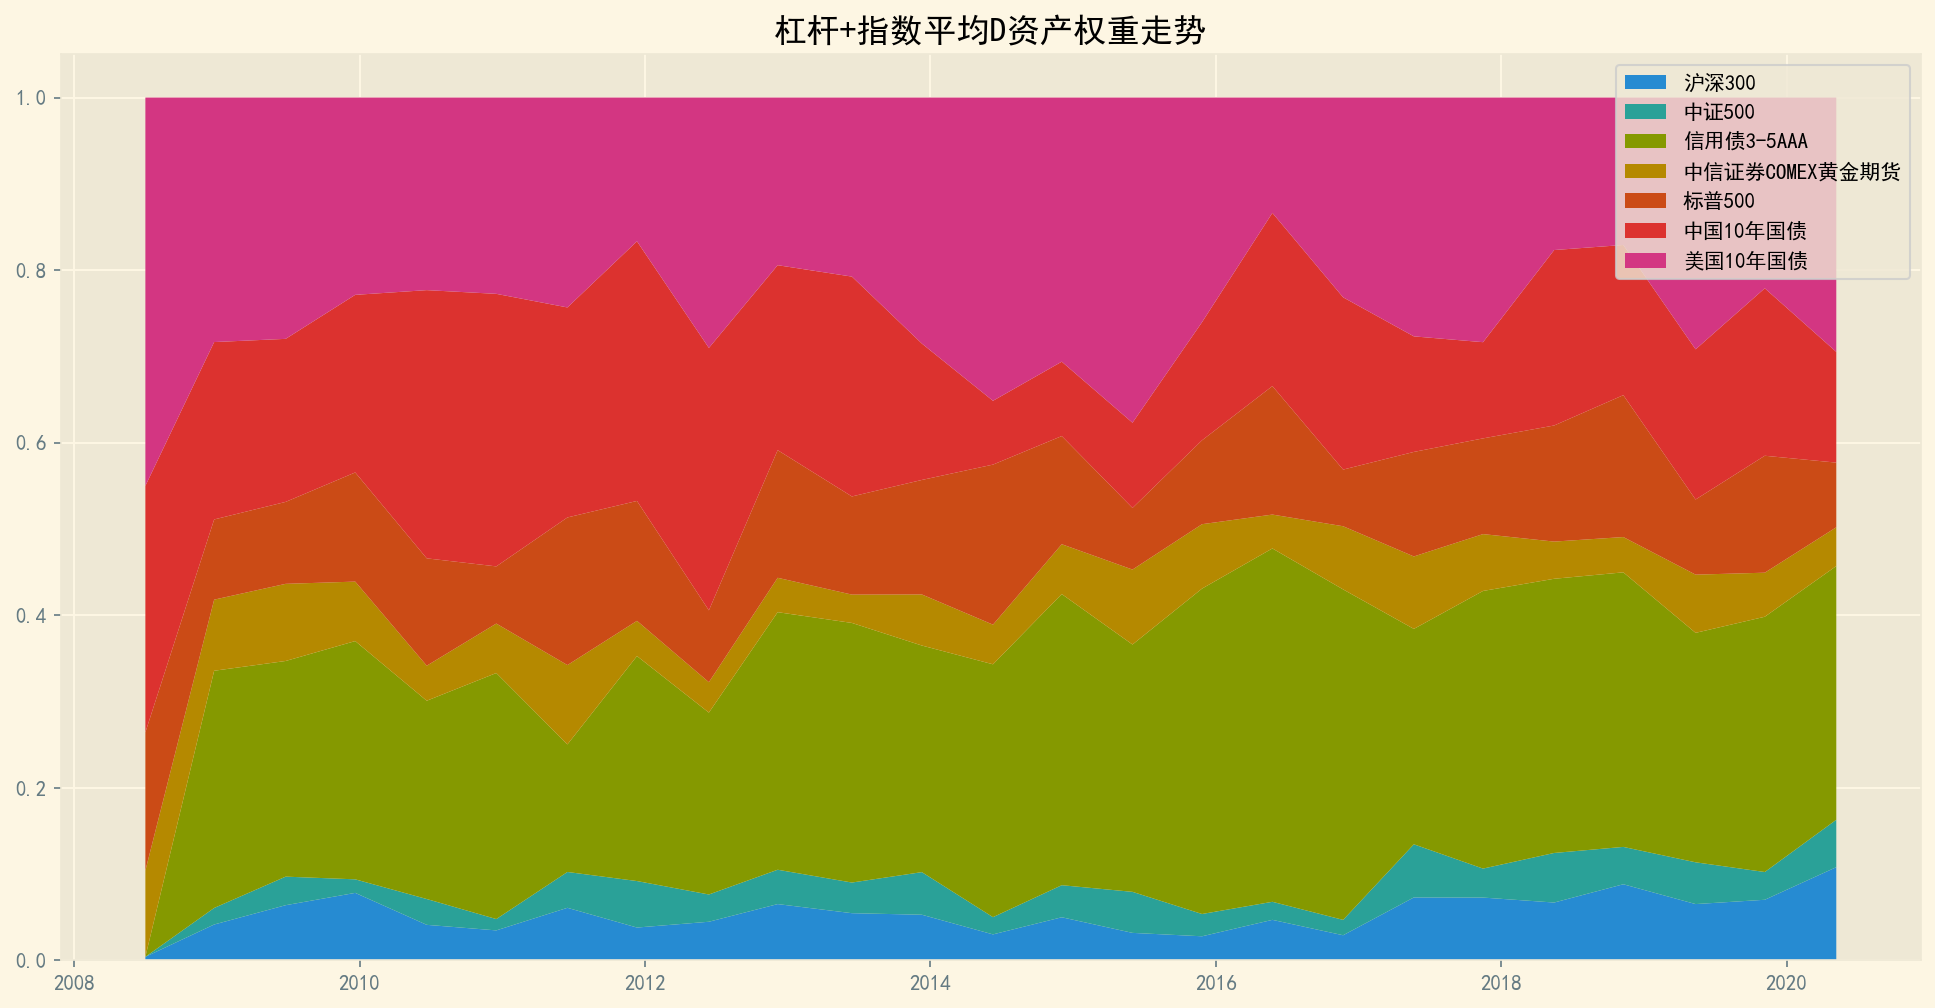

In [21]:
StatisticFunc.WeightPlot(tradeDF, weightDF, '杠杆+指数平均D')

## 回测表现汇总

In [22]:
# 表现汇总
years = np.unique(tradeDF.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF = pd.DataFrame(index=years)

SummaryDF["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF['投资组合净值']) )
SummaryDF["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF['投资组合净值'])).values
SummaryDF["无基准夏普比率"] = SummaryDF['年收益率'] / SummaryDF['年波动率']
SummaryDF["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF['最大回撤'])).values

SummaryDF

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.200773,0.089616,2.24038,-0.026002
2009,0.0599853,0.065818,0.911387,-0.033627
2010,0.06386,0.050125,1.27402,-0.062468
2011,0.0809654,0.059791,1.35415,-0.076954
2012,0.0670996,0.034145,1.96512,-0.029975
2013,-0.0441746,0.049607,-0.890491,-0.106167
2014,0.182621,0.032443,5.62891,-0.107713
2015,0.148627,0.043693,3.40162,-0.031350
2016,0.0278491,0.035388,0.786964,-0.071259
2017,0.00323524,0.026264,0.123181,-0.079700


## 收益率贡献度

In [23]:
annualContrb = StatisticFunc.AnnualContribution(tradeDF=tradeDF, weightDF=weightDF, assetDF=leverCumReturns)

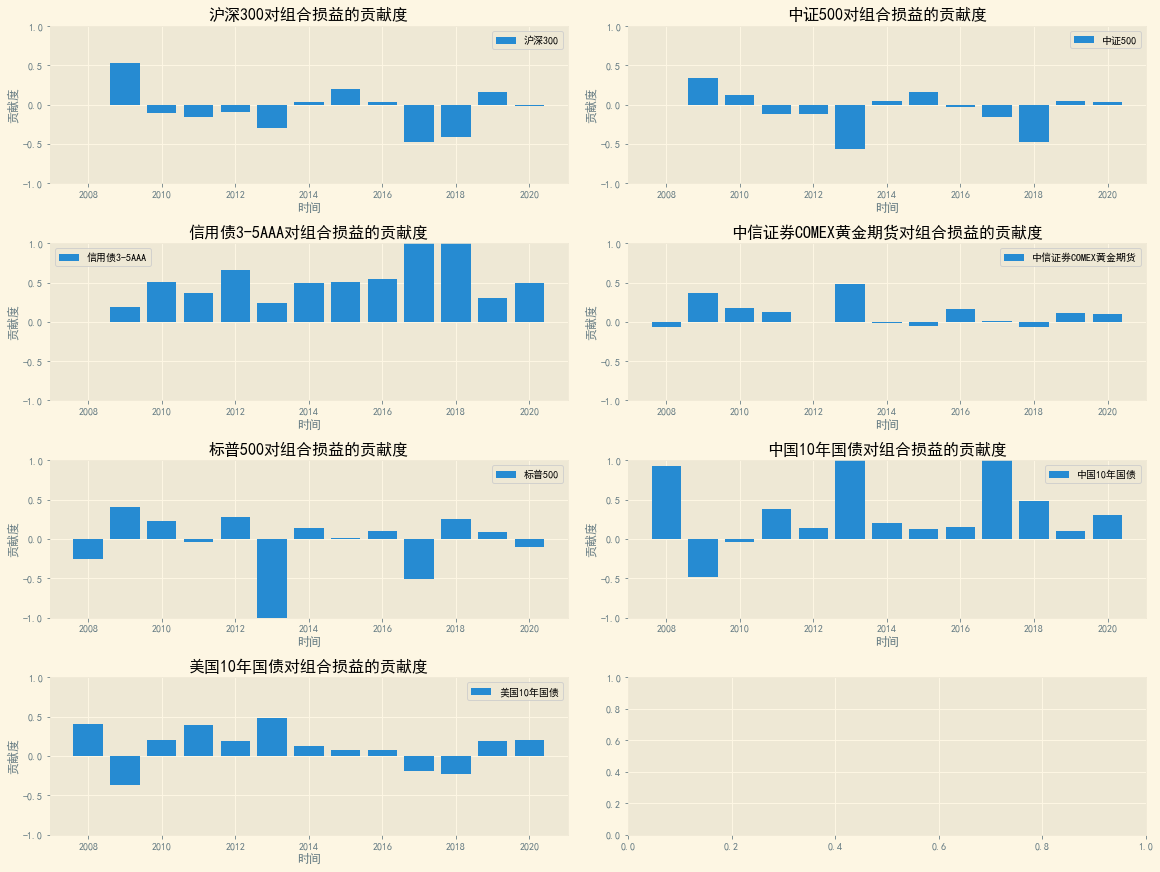

In [24]:
StatisticFunc.BarPlot(annualContrb, '杠杆+指数平均D')

## 投资组合净值曲线

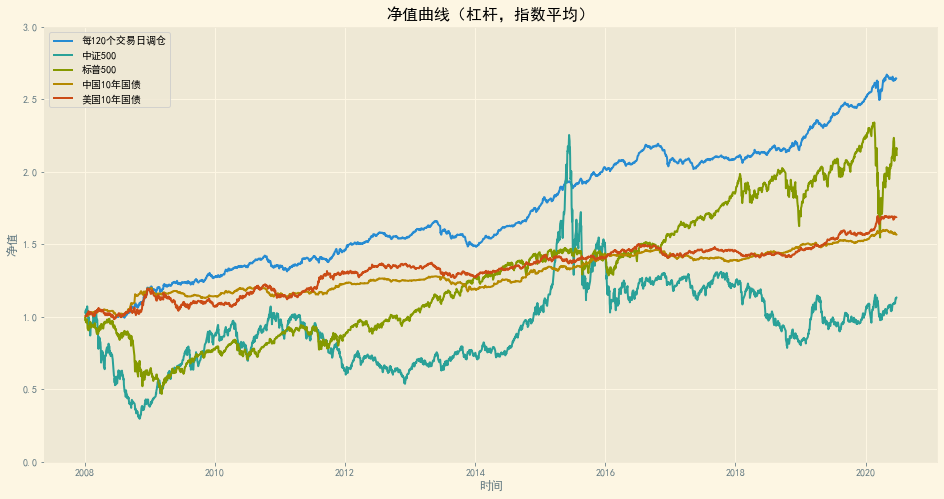

In [72]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF.index, tradeDF['投资组合净值']/10000, label='每120个交易日调仓')
    
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['标普500'], label='标普500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 3.0)
plt.legend(loc='upper left')
plt.title('净值曲线（杠杆，指数平均）')
plt.savefig('净值曲线（杠杆，指数平均）D.png')

# 风险平价 + 杠杆 + 多因子策略（指数平均）

## 基准组合（多因子）

### 程序运行

In [26]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':True, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':True, 
            'copperGold':True, 'copperGas':True}

tradeDF_multi, weightDF_multi = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', 
                                       dt=120, up=0.50, thresholds=thrds, factorDict=factors)

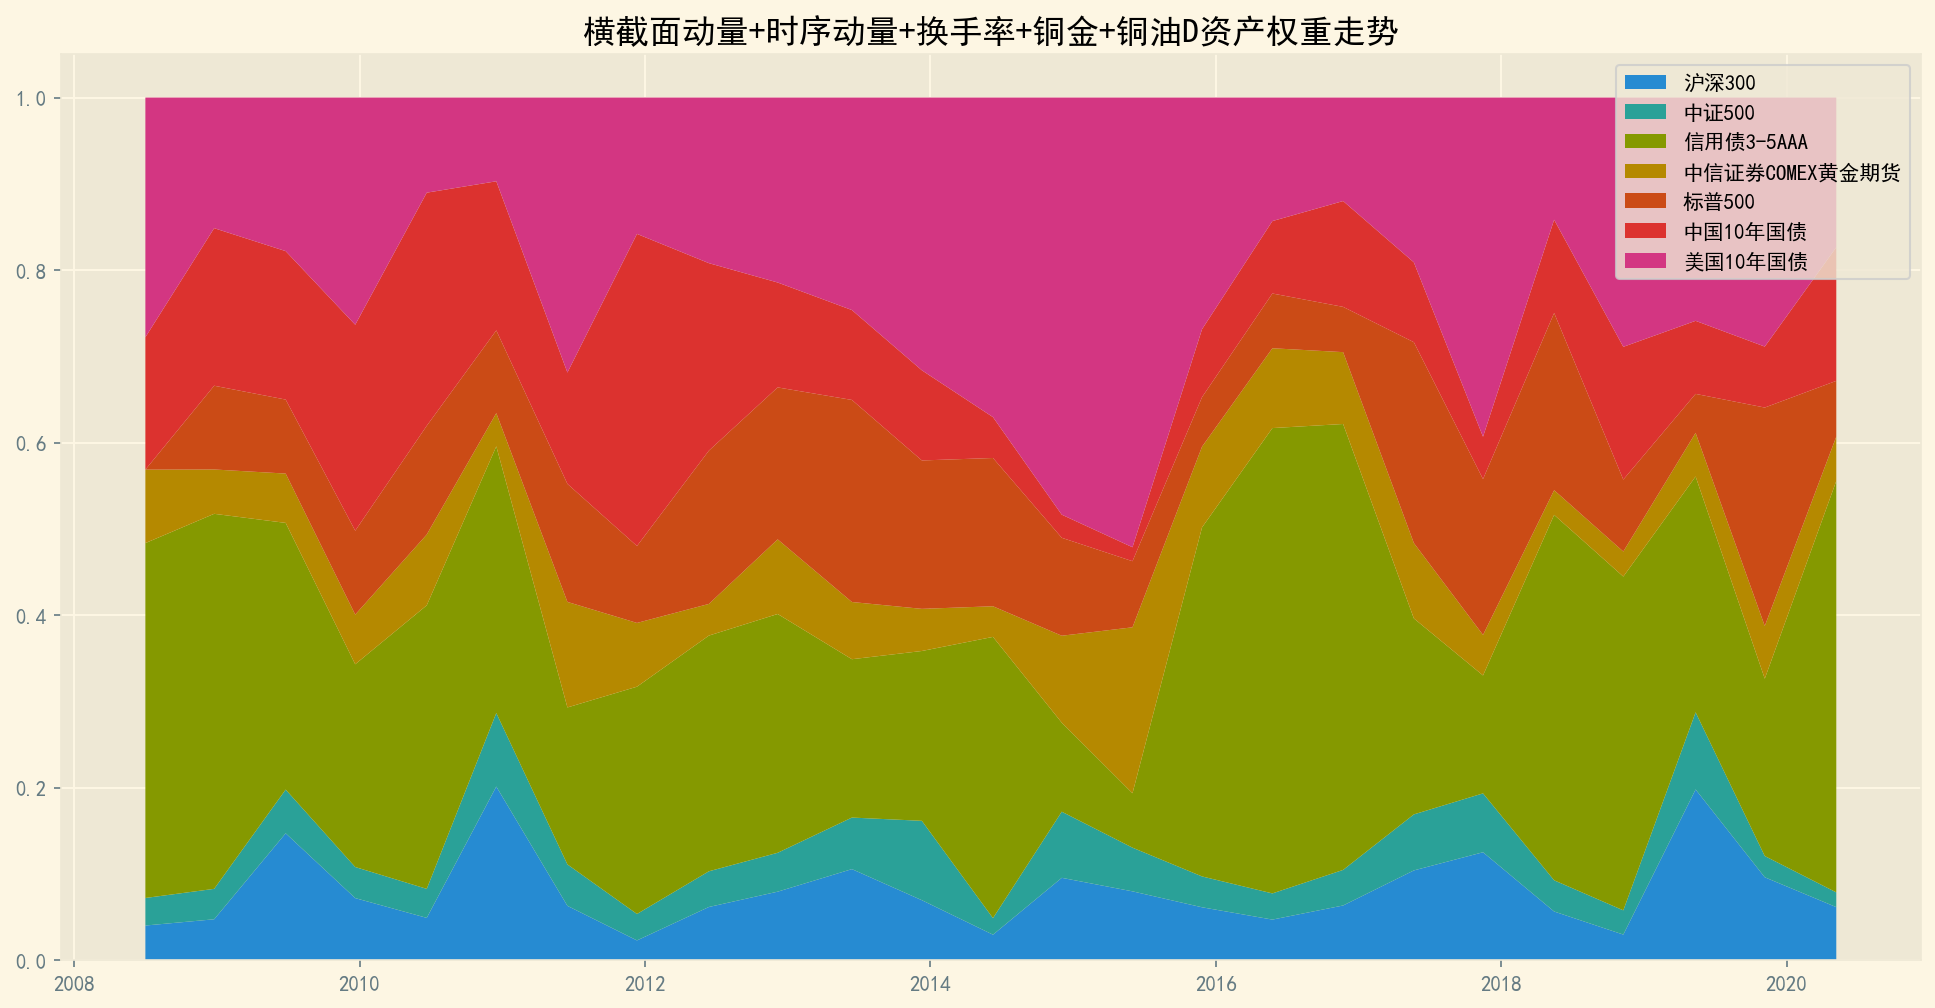

In [27]:
StatisticFunc.WeightPlot(tradeDF_multi, weightDF_multi, '横截面动量+时序动量+换手率+铜金+铜油D')

### 回测表现汇总

In [28]:
# 表现汇总
years = np.unique(tradeDF_multi.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF_multi = pd.DataFrame(index=years)

SummaryDF_multi["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF_multi['投资组合净值']) )
SummaryDF_multi["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF_multi['投资组合净值'])).values
SummaryDF_multi["无基准夏普比率"] = SummaryDF_multi['年收益率'] / SummaryDF_multi['年波动率']
SummaryDF_multi["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF_multi['最大回撤'])).values

SummaryDF_multi

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.219751,0.098658,2.2274,-0.038776
2009,0.100017,0.084399,1.18505,-0.048592
2010,0.0619983,0.053916,1.14991,-0.066291
2011,0.0513845,0.068272,0.752646,-0.080275
2012,0.0673842,0.037194,1.81168,-0.028342
2013,-0.000827711,0.054512,-0.015184,-0.066189
2014,0.176168,0.034250,5.14362,-0.060434
2015,0.124863,0.067826,1.84094,-0.064136
2016,0.0181732,0.039014,0.465815,-0.077132
2017,0.0194865,0.029810,0.653683,-0.089808


### 收益率贡献度

In [29]:
annualContrb_multi = StatisticFunc.AnnualContribution(tradeDF=tradeDF_multi, 
                                                      weightDF=weightDF_multi, 
                                                      assetDF=leverCumReturns)

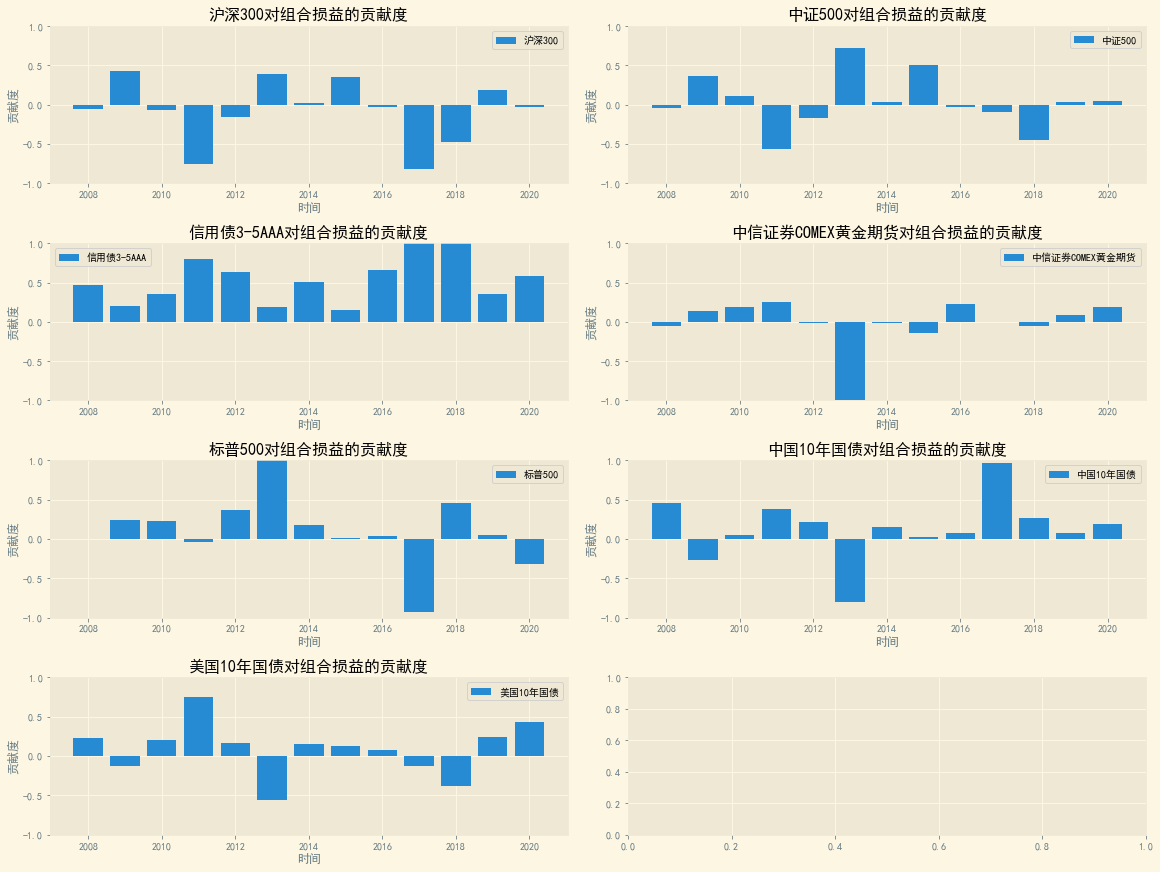

In [30]:
StatisticFunc.BarPlot(annualContrb_multi, '横截面动量+时序动量+换手率+铜金+铜油D')

### 投资组合净值曲线

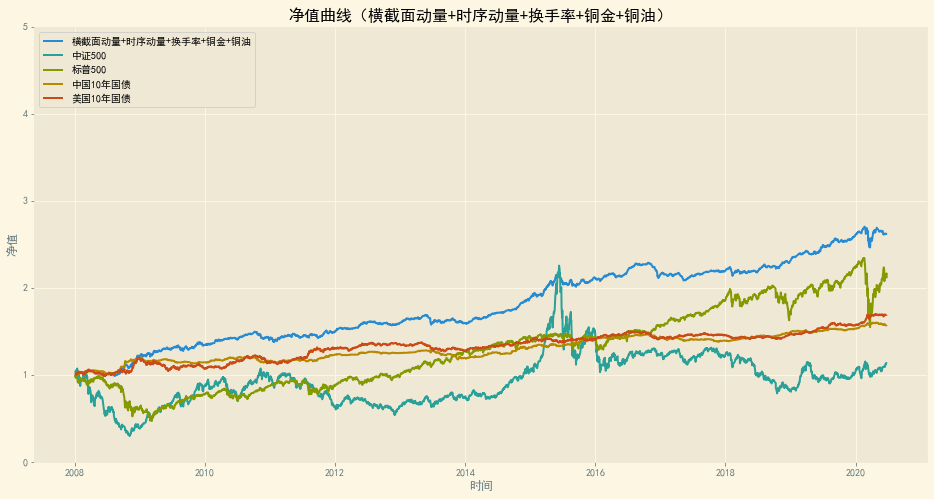

In [71]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, label='横截面动量+时序动量+换手率+铜金+铜油')
    
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['标普500'], label='标普500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')


plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（横截面动量+时序动量+换手率+铜金+铜油）')
plt.savefig('净值曲线（横截面动量+时序动量+换手率+铜金+铜油）D.png')

## 换手率

### 程序运行

In [32]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':True, 
            'copperGold':False, 'copperGas':False}

tradeDF_1, weightDF_1 = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', 
                                       dt=120, up=0.50, thresholds=thrds, factorDict=factors)

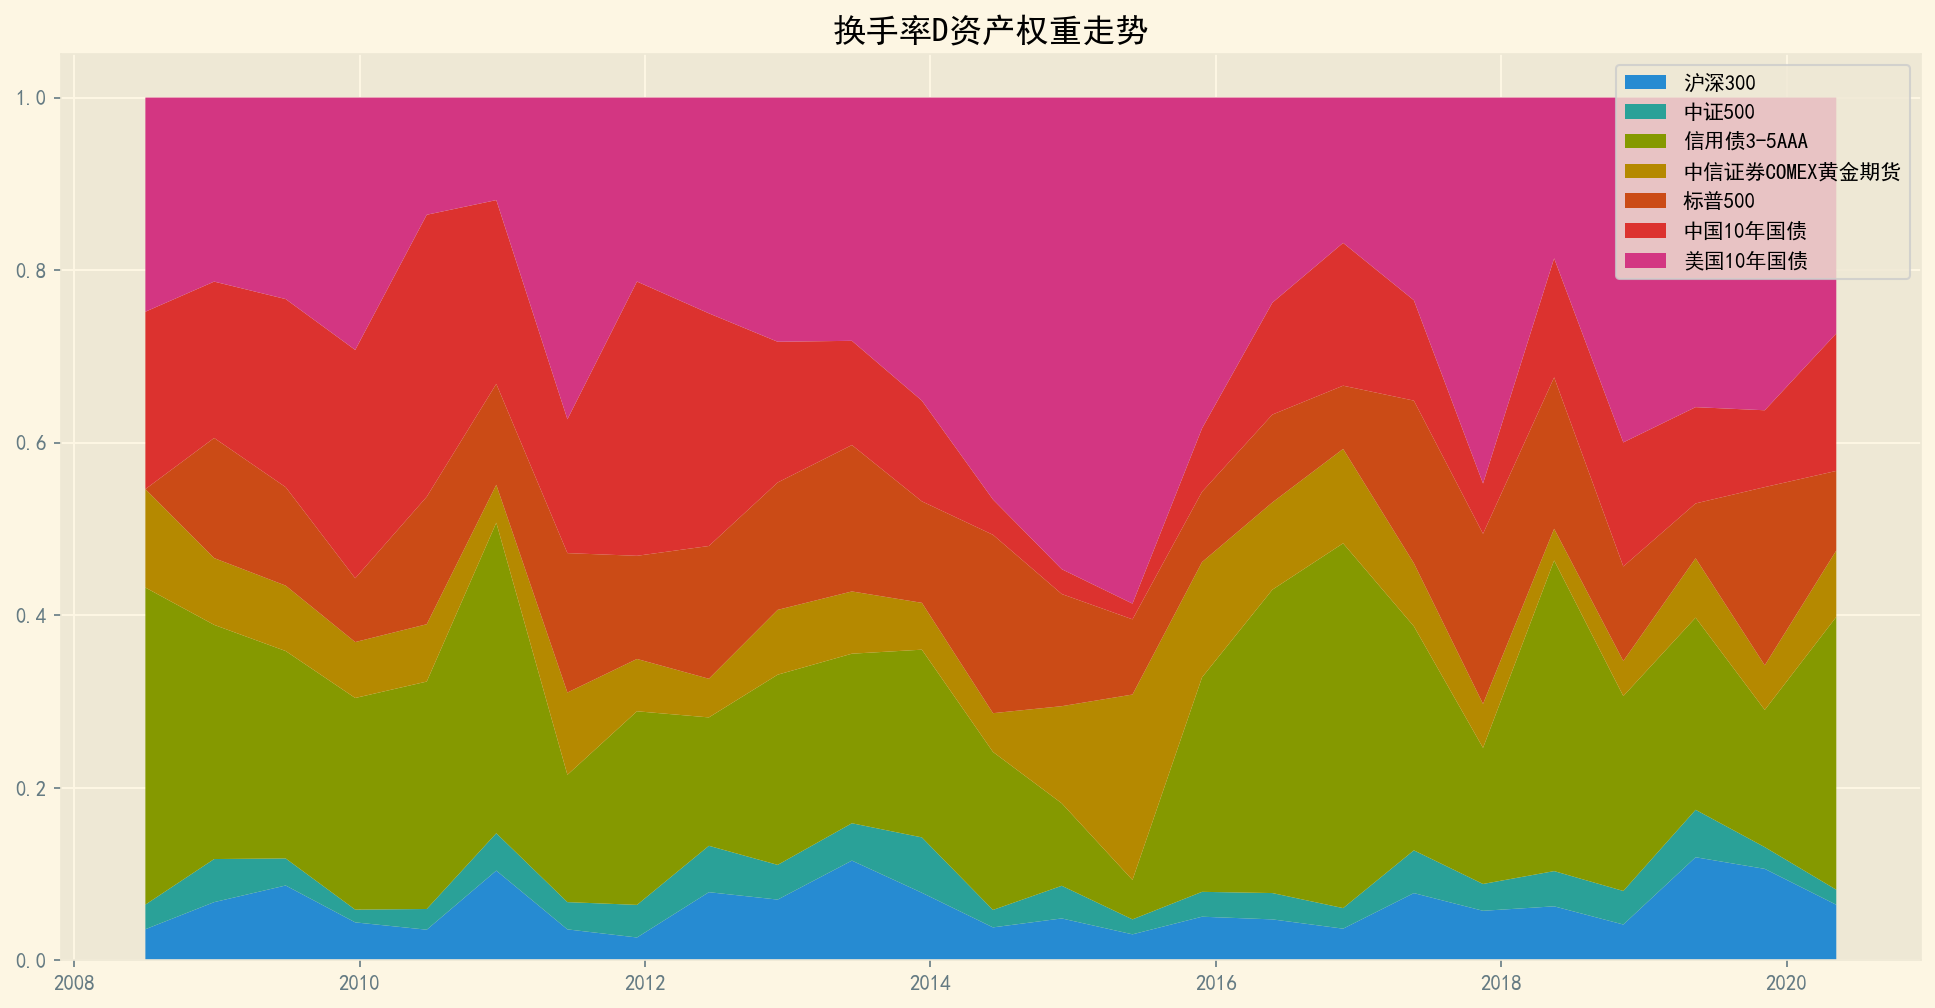

In [33]:
StatisticFunc.WeightPlot(tradeDF_1, weightDF_1, '换手率D')

### 回测表现汇总

In [34]:
# 表现汇总
years = np.unique(tradeDF_1.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF_1 = pd.DataFrame(index=years)

SummaryDF_1["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF_1['投资组合净值']) )
SummaryDF_1["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF_1['投资组合净值'])).values
SummaryDF_1["无基准夏普比率"] = SummaryDF_1['年收益率'] / SummaryDF_1['年波动率']
SummaryDF_1["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF_1['最大回撤'])).values

SummaryDF_1

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.234684,0.100691,2.33075,-0.039331
2009,0.108829,0.075488,1.44168,-0.042147
2010,0.0772364,0.050587,1.52681,-0.062278
2011,0.0760491,0.061681,1.23295,-0.070389
2012,0.0571652,0.036397,1.57059,-0.028831
2013,-0.0237302,0.051575,-0.460115,-0.071392
2014,0.159507,0.031097,5.12935,-0.074774
2015,0.079672,0.051058,1.56041,-0.032759
2016,0.0267778,0.039261,0.682037,-0.074557
2017,0.0176629,0.026457,0.667607,-0.081405


### 收益率贡献度

In [35]:
annualContrb_1 = StatisticFunc.AnnualContribution(tradeDF=tradeDF_1, weightDF=weightDF_1, assetDF=leverCumReturns)

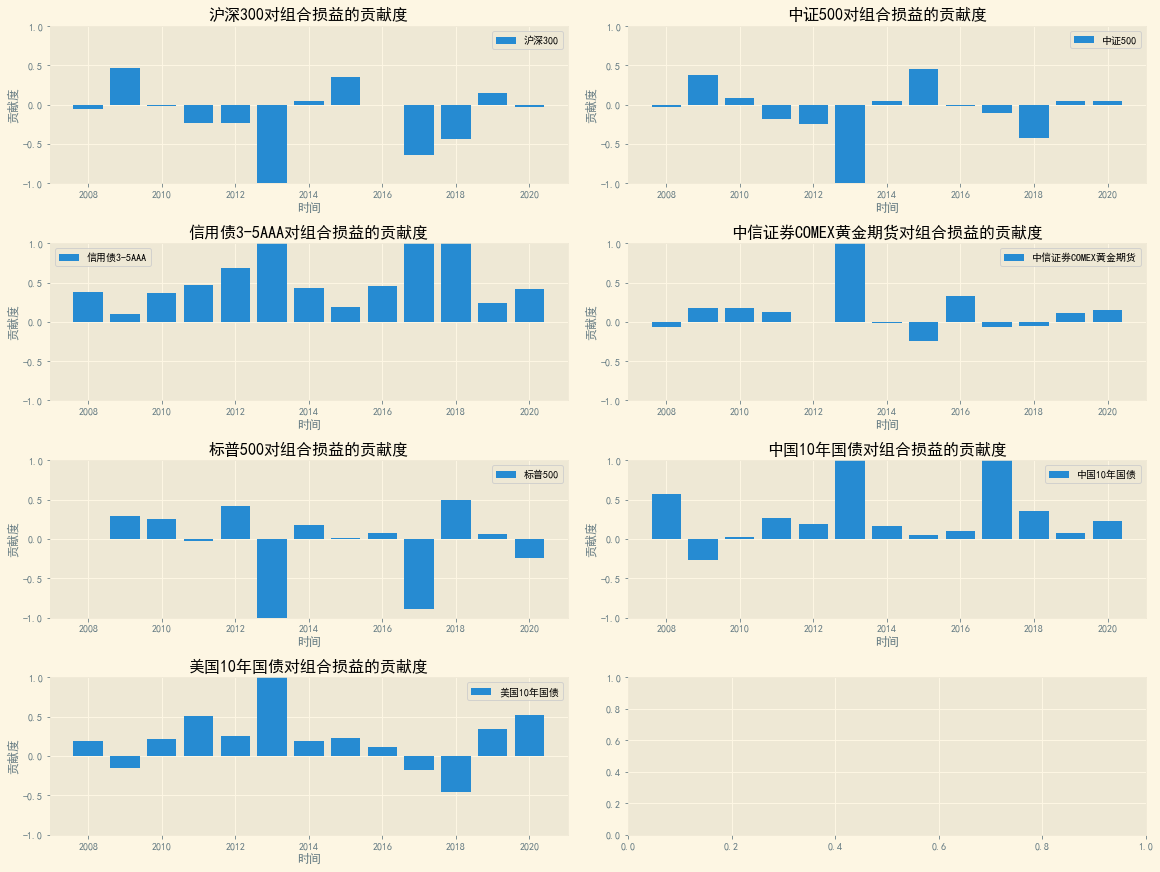

In [36]:
StatisticFunc.BarPlot(annualContrb_1, '换手率D')

### 投资组合净值曲线

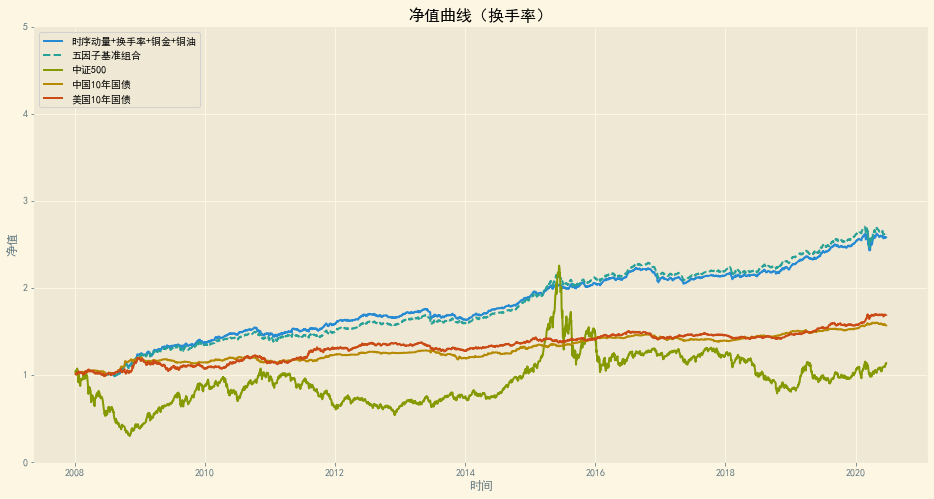

In [64]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_1.index, tradeDF_1['投资组合净值']/10000, label='时序动量+换手率+铜金+铜油')

# 基准参考
plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, ls='--', label='五因子基准组合')    
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（换手率）')
plt.savefig('净值曲线（换手率）D.png')

## 横截面动量

### 程序运行

In [38]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':True, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 
            'copperGold':False, 'copperGas':False}

tradeDF_2, weightDF_2 = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', 
                                       dt=120, up=0.50, thresholds=thrds, factorDict=factors)

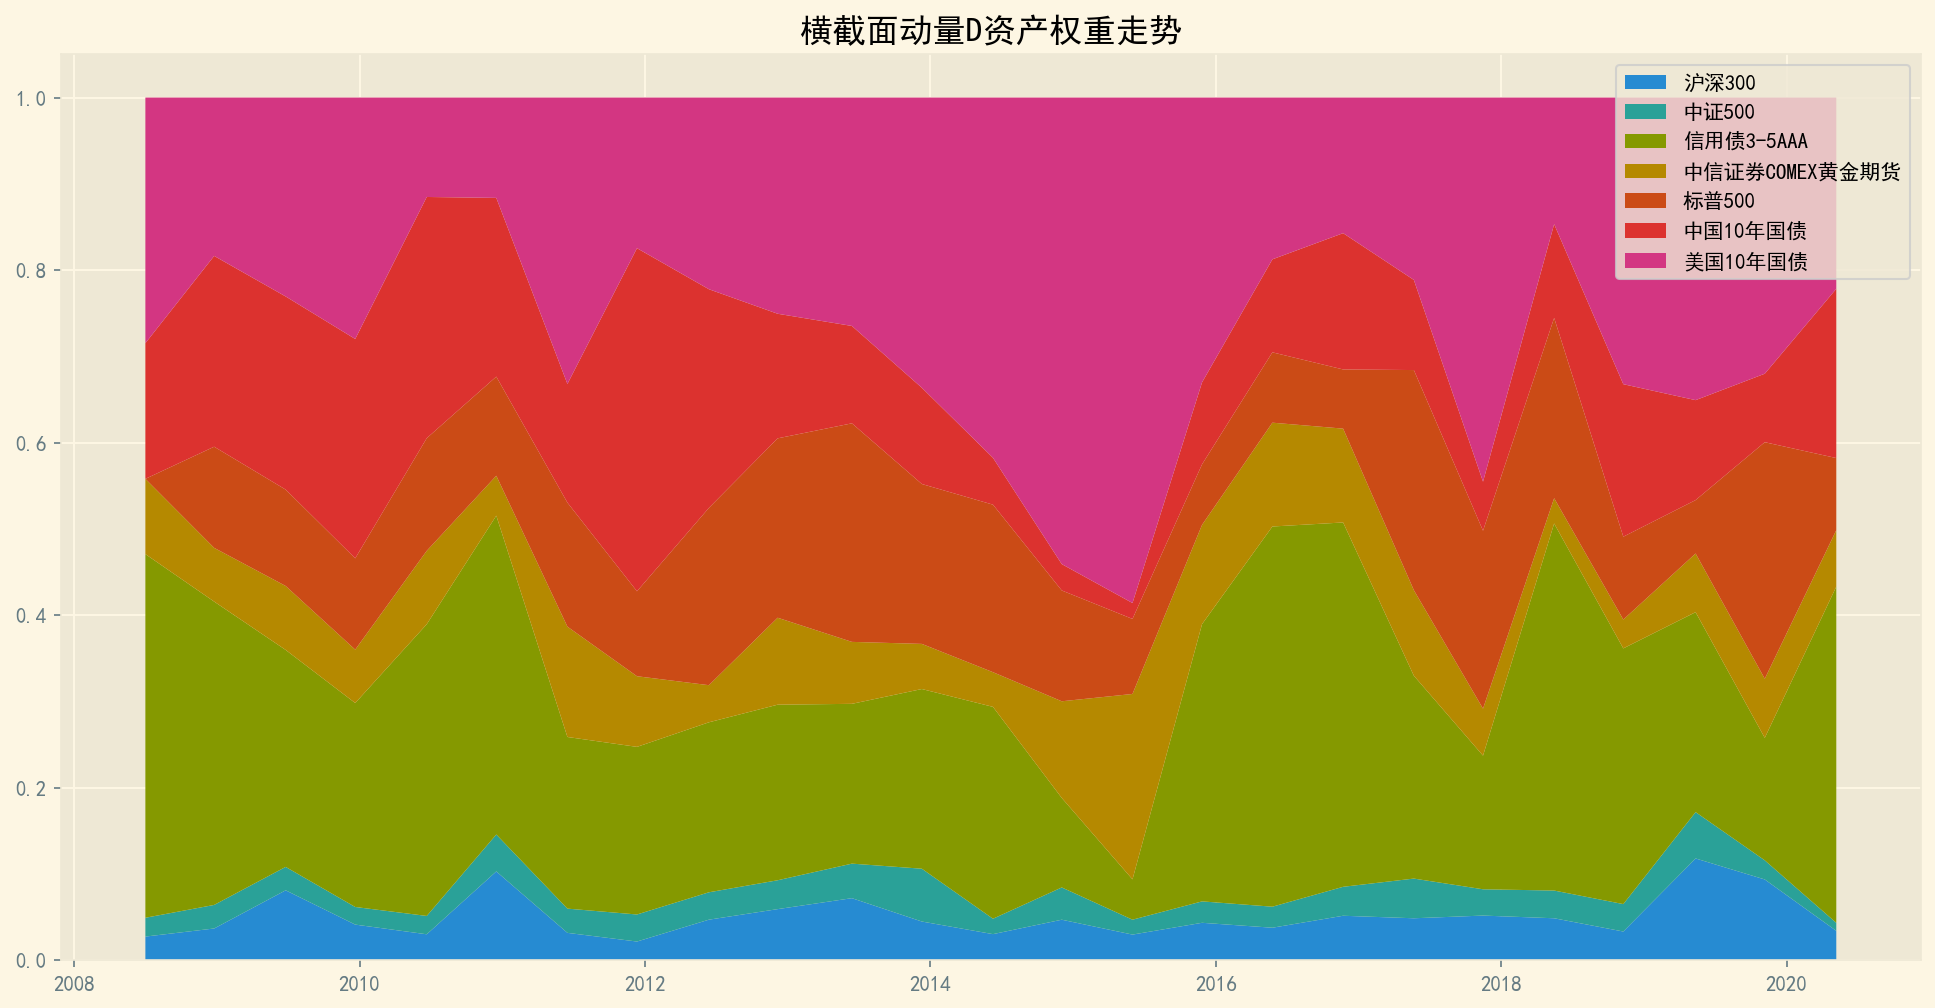

In [39]:
StatisticFunc.WeightPlot(tradeDF_2, weightDF_2, '横截面动量D')

### 回测表现汇总

In [40]:
# 表现汇总
years = np.unique(tradeDF_2.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF_2 = pd.DataFrame(index=years)

SummaryDF_2["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF_2['投资组合净值']) )
SummaryDF_2["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF_2['投资组合净值'])).values
SummaryDF_2["无基准夏普比率"] = SummaryDF_2['年收益率'] / SummaryDF_2['年波动率']
SummaryDF_2["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF_2['最大回撤'])).values

SummaryDF_2

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.232388,0.098573,2.35753,-0.037310
2009,0.0700929,0.070097,0.99994,-0.035666
2010,0.0736403,0.050543,1.457,-0.062599
2011,0.0782027,0.063180,1.23778,-0.070727
2012,0.0627809,0.037286,1.68375,-0.026064
2013,-0.00570105,0.050892,-0.112023,-0.060916
2014,0.166357,0.029601,5.62001,-0.058496
2015,0.0834383,0.050609,1.64869,-0.032585
2016,0.0267396,0.038114,0.70156,-0.075118
2017,0.016204,0.027163,0.596555,-0.082584


### 收益率贡献度

In [41]:
annualContrb_2 = StatisticFunc.AnnualContribution(tradeDF=tradeDF_2, weightDF=weightDF_2, assetDF=leverCumReturns)

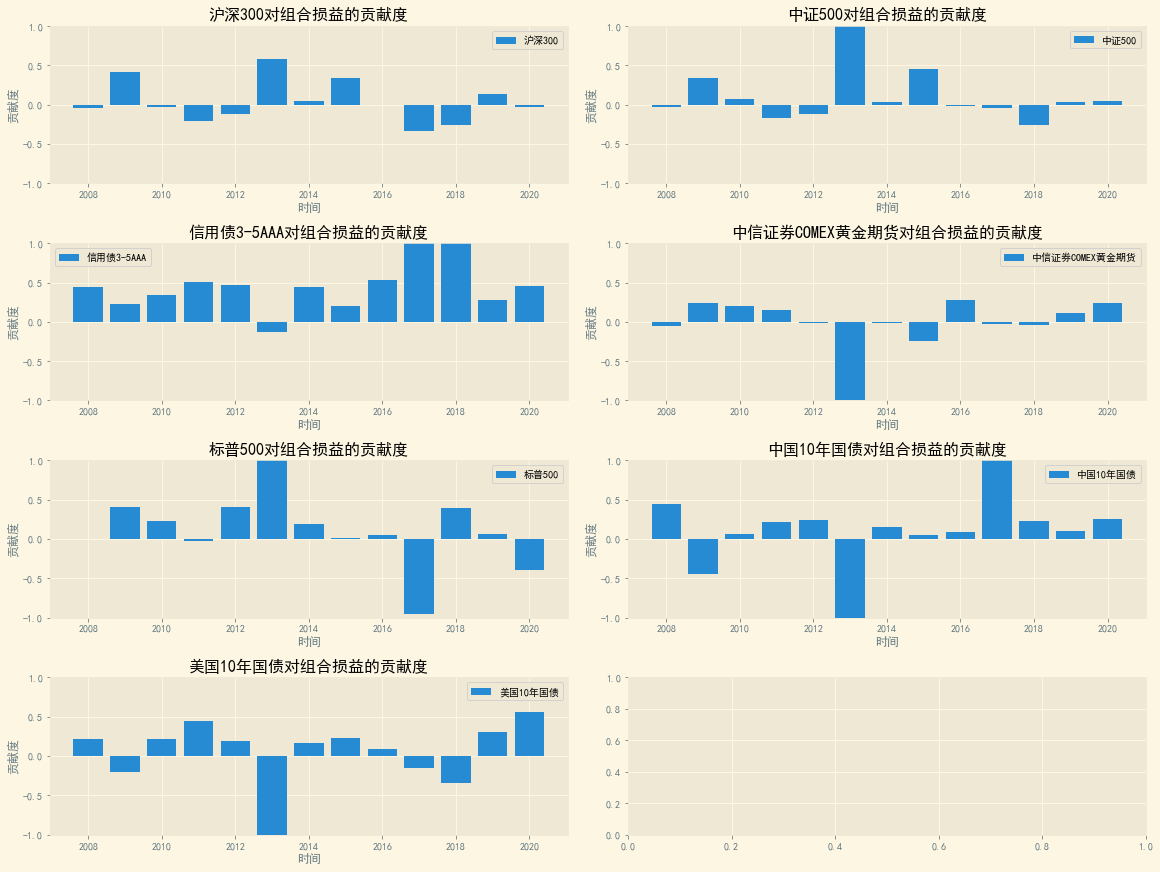

In [42]:
StatisticFunc.BarPlot(annualContrb_2, '横截面动量D')

### 投资组合净值曲线

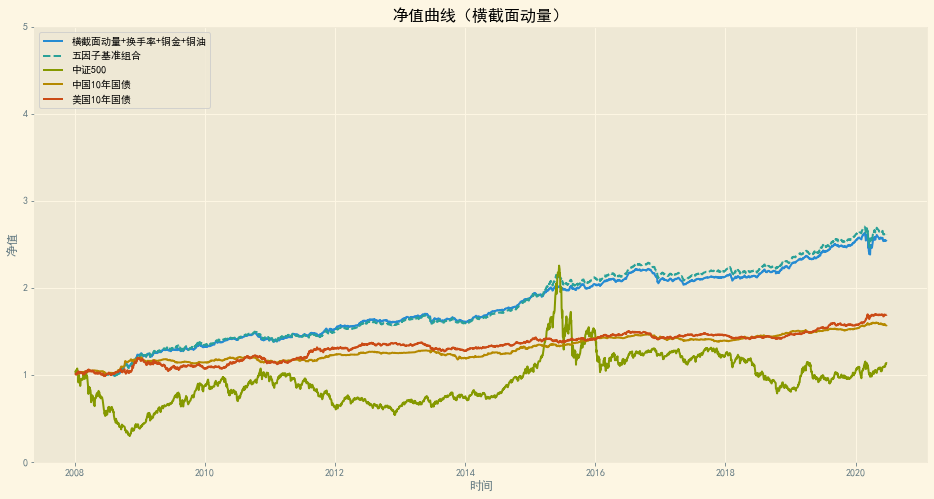

In [65]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_2.index, tradeDF_2['投资组合净值']/10000, label='横截面动量+换手率+铜金+铜油')
        
# 基准参考
plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, ls='--', label='五因子基准组合')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（横截面动量）')
plt.savefig('净值曲线（横截面动量）D.png')

## 时序动量

### 程序运行

In [44]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':True, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 
            'copperGold':False, 'copperGas':False}

tradeDF_3, weightDF_3 = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', 
                                       dt=120, up=0.50, thresholds=thrds, factorDict=factors)

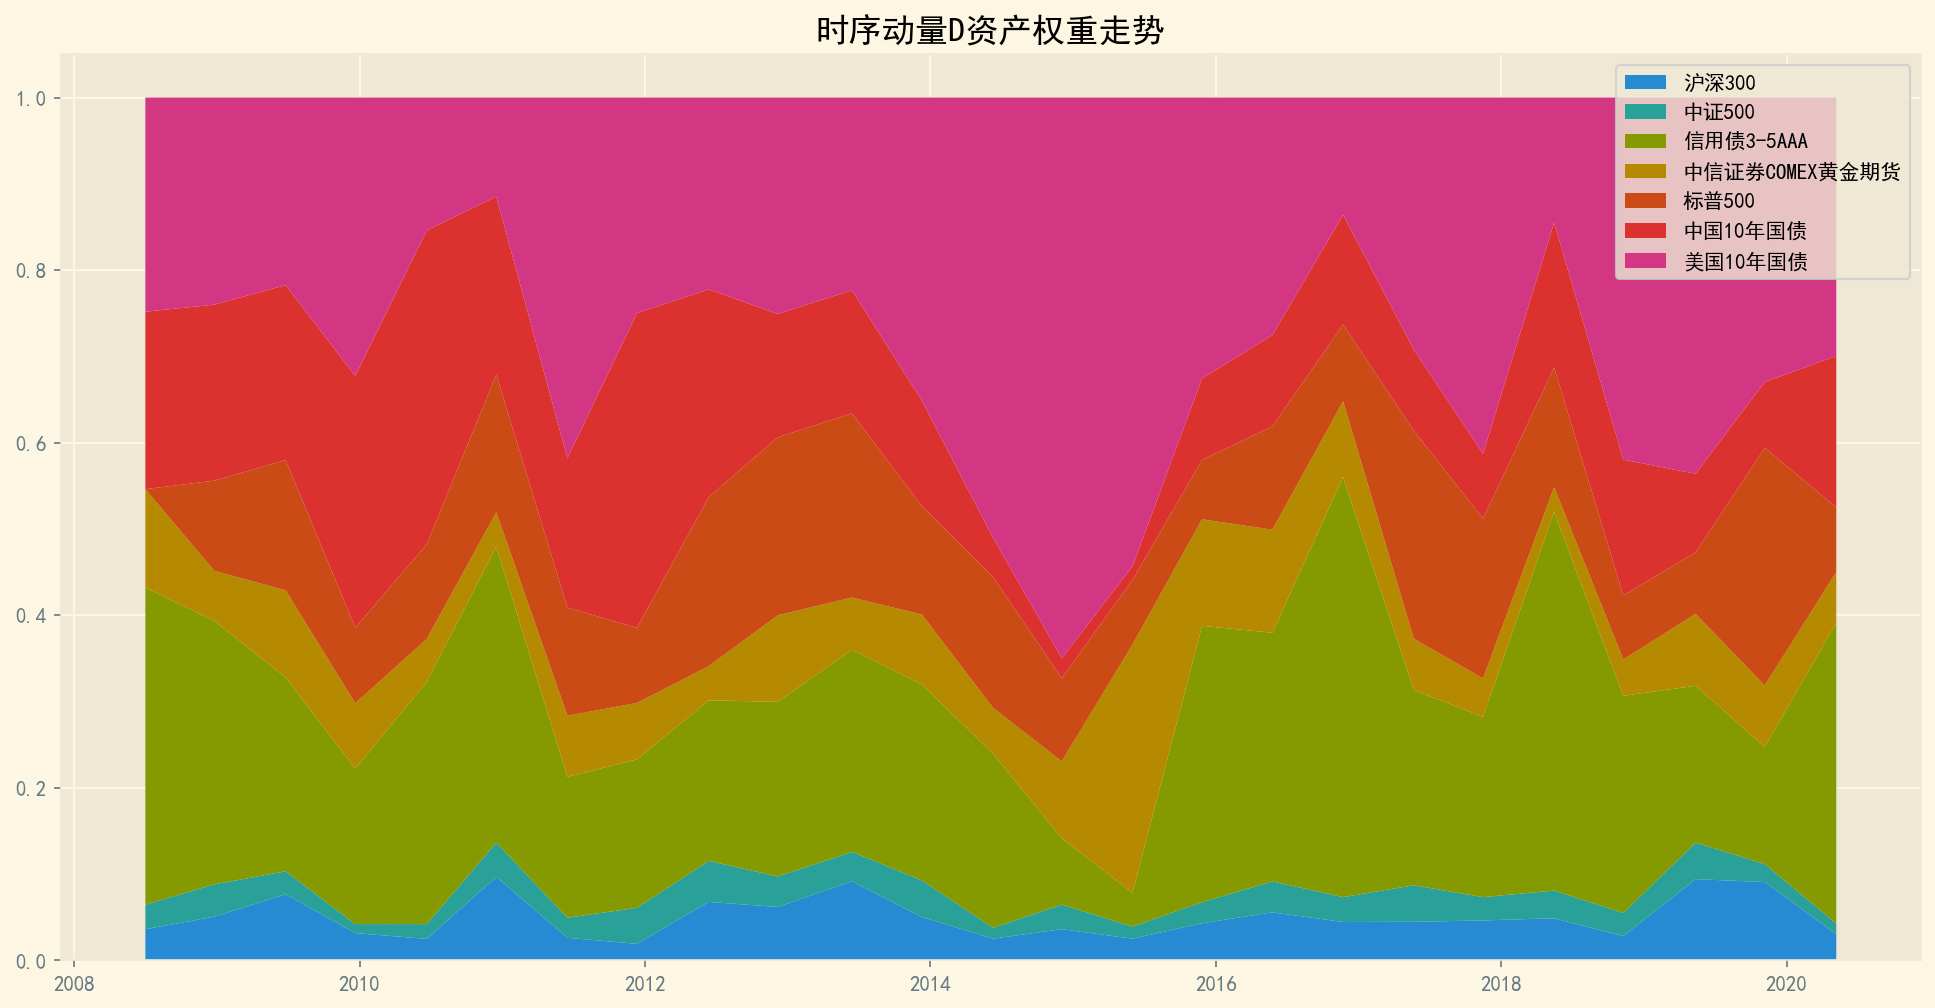

In [45]:
StatisticFunc.WeightPlot(tradeDF_3, weightDF_3, '时序动量D')

### 回测表现汇总

In [46]:
# 表现汇总
years = np.unique(tradeDF_3.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF_3 = pd.DataFrame(index=years)

SummaryDF_3["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF_3['投资组合净值']) )
SummaryDF_3["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF_3['投资组合净值'])).values
SummaryDF_3["无基准夏普比率"] = SummaryDF_3['年收益率'] / SummaryDF_3['年波动率']
SummaryDF_3["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF_3['最大回撤'])).values

SummaryDF_3

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.233301,0.100733,2.31602,-0.039331
2009,0.093806,0.071360,1.31455,-0.034361
2010,0.0639738,0.049948,1.28082,-0.071163
2011,0.0836004,0.058112,1.43862,-0.077045
2012,0.0535841,0.037229,1.43931,-0.028328
2013,-0.0218054,0.051399,-0.424243,-0.070191
2014,0.158667,0.029023,5.46686,-0.072250
2015,0.0620238,0.052638,1.1783,-0.037538
2016,0.0216256,0.038824,0.557013,-0.074930
2017,0.013218,0.025233,0.523842,-0.083690


### 收益率贡献度

In [47]:
annualContrb_3 = StatisticFunc.AnnualContribution(tradeDF=tradeDF_3, weightDF=weightDF_3, assetDF=leverCumReturns)

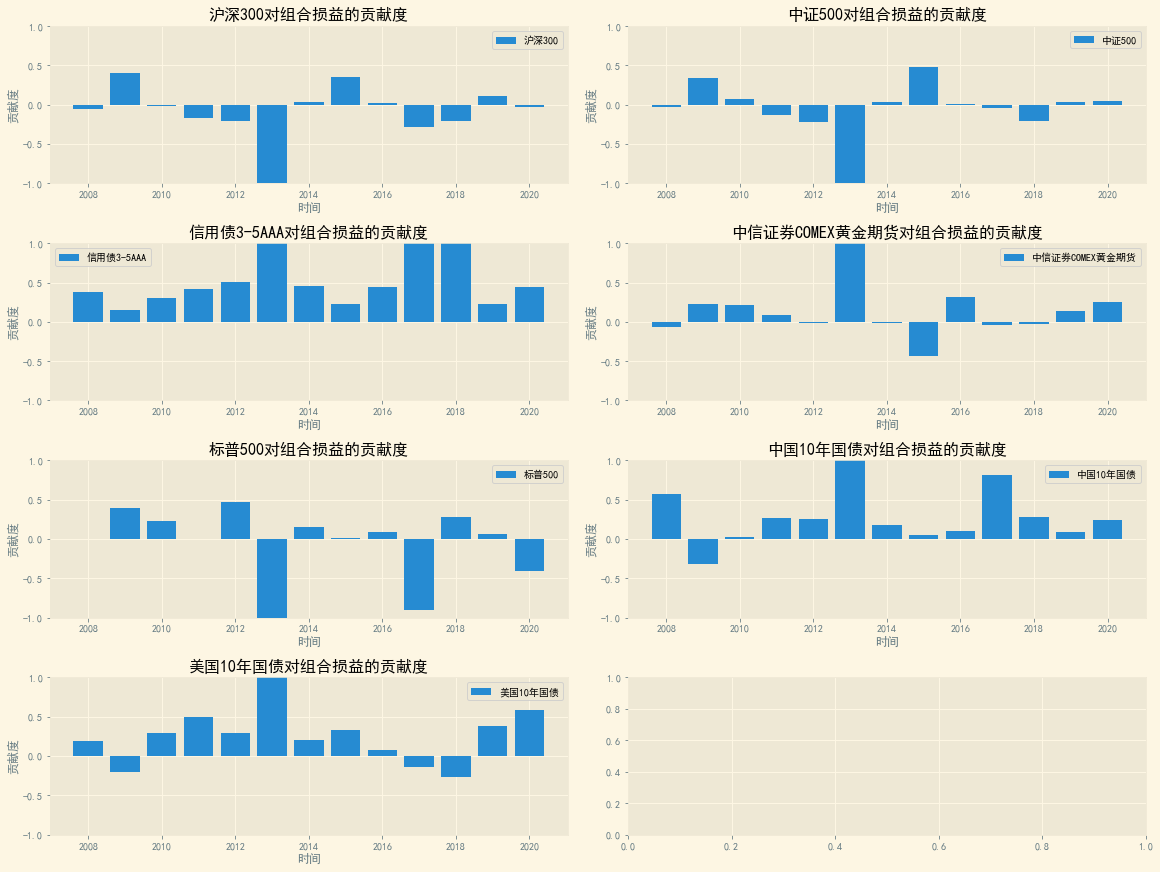

In [48]:
StatisticFunc.BarPlot(annualContrb_3, '时序动量D')

### 投资组合净值曲线

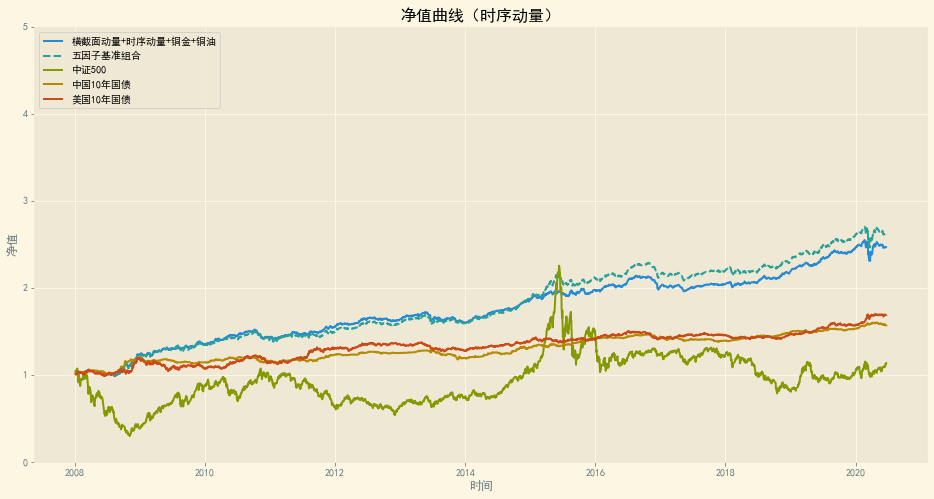

In [66]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_3.index, tradeDF_3['投资组合净值']/10000, label='横截面动量+时序动量+铜金+铜油')
    
# 基准参考
plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, ls='--', label='五因子基准组合')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（时序动量）')
plt.savefig('净值曲线（时序动量）D.png')

## 铜金

### 程序运行

In [50]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 
            'copperGold':True, 'copperGas':False}

tradeDF_4, weightDF_4 = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', 
                                       dt=120, up=0.50, thresholds=thrds, factorDict=factors)

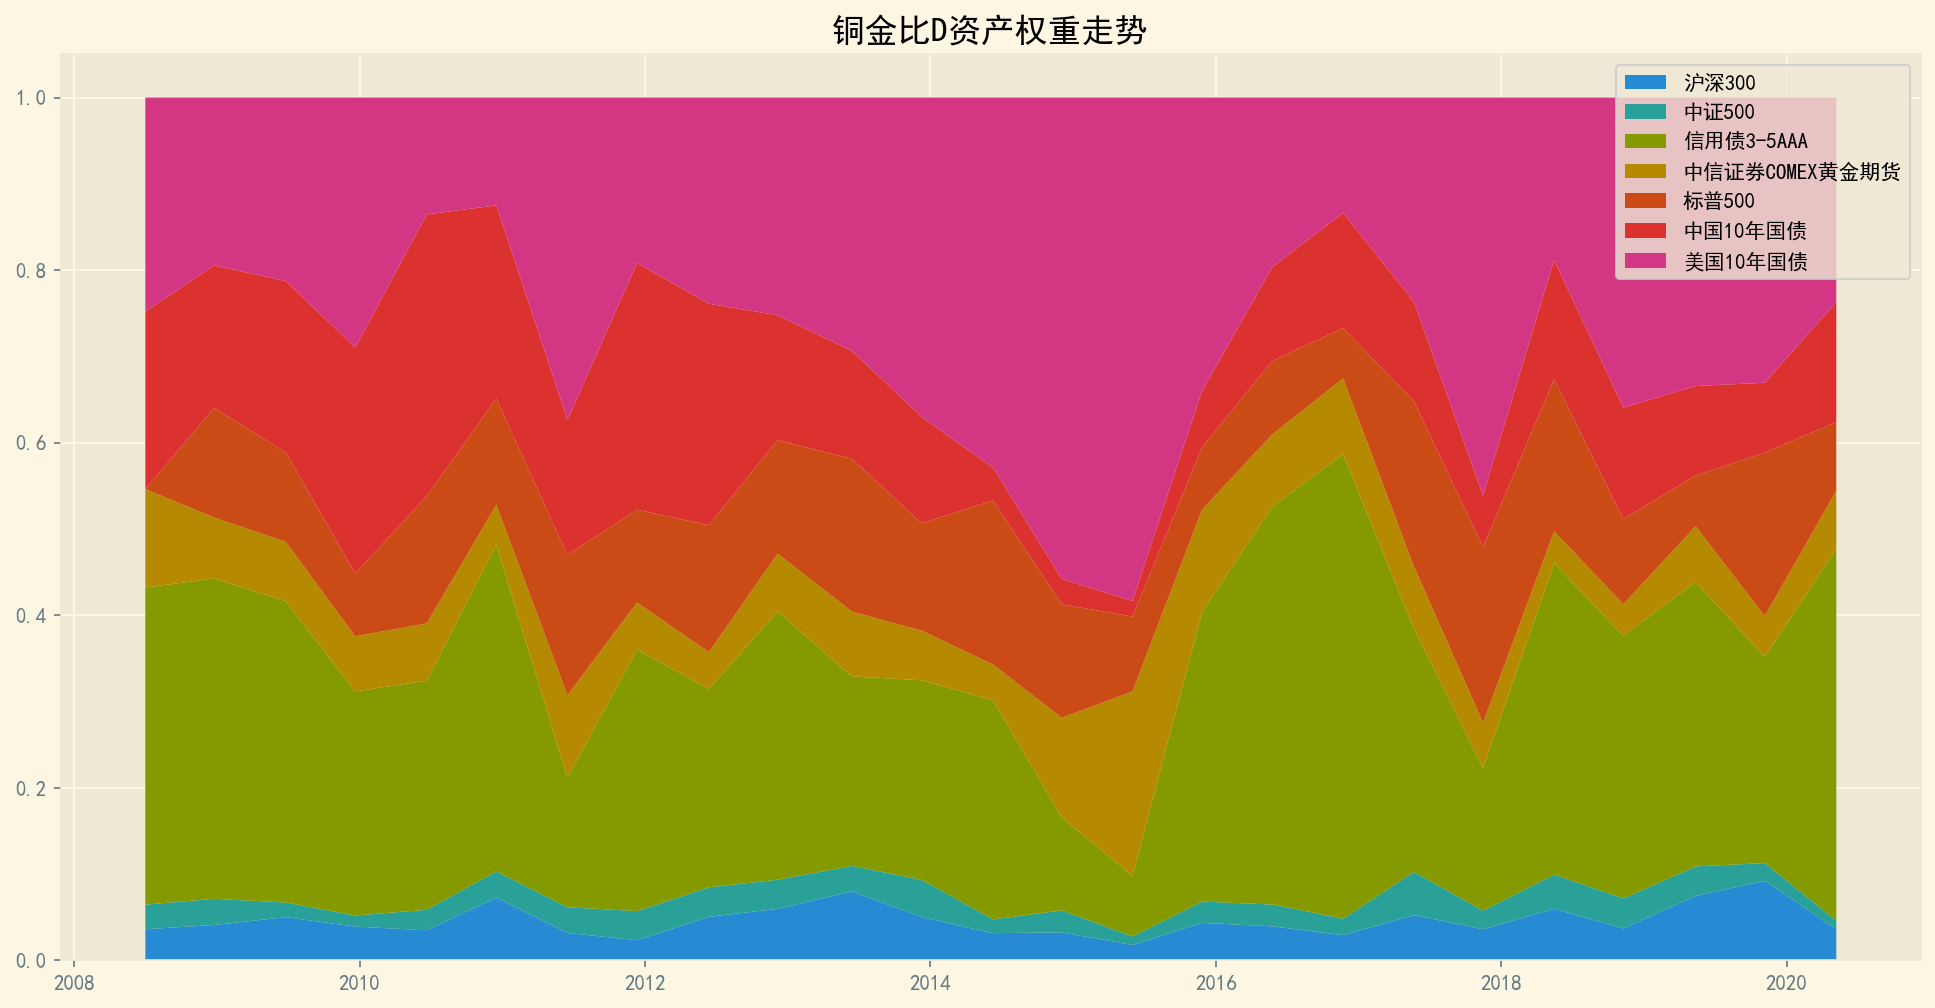

In [51]:
StatisticFunc.WeightPlot(tradeDF_4, weightDF_4, '铜金比D')

### 回测表现汇总

In [52]:
# 表现汇总
years = np.unique(tradeDF_4.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF_4 = pd.DataFrame(index=years)

SummaryDF_4["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF_4['投资组合净值']) )
SummaryDF_4["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF_4['投资组合净值'])).values
SummaryDF_4["无基准夏普比率"] = SummaryDF_4['年收益率'] / SummaryDF_4['年波动率']
SummaryDF_4["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF_4['最大回撤'])).values

SummaryDF_4

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.237588,0.100998,2.35241,-0.039331
2009,0.0705429,0.068794,1.02543,-0.034330
2010,0.0818615,0.050258,1.62882,-0.061770
2011,0.0835508,0.061128,1.36683,-0.067186
2012,0.0699431,0.033990,2.05775,-0.025911
2013,-0.0208656,0.047166,-0.442391,-0.071680
2014,0.165679,0.028291,5.85627,-0.074483
2015,0.072828,0.047254,1.54122,-0.026365
2016,0.0260125,0.037705,0.689895,-0.077191
2017,0.00823728,0.025588,0.321918,-0.089293


### 收益率贡献度

In [53]:
annualContrb_4 = StatisticFunc.AnnualContribution(tradeDF=tradeDF_4, weightDF=weightDF_4, assetDF=leverCumReturns)

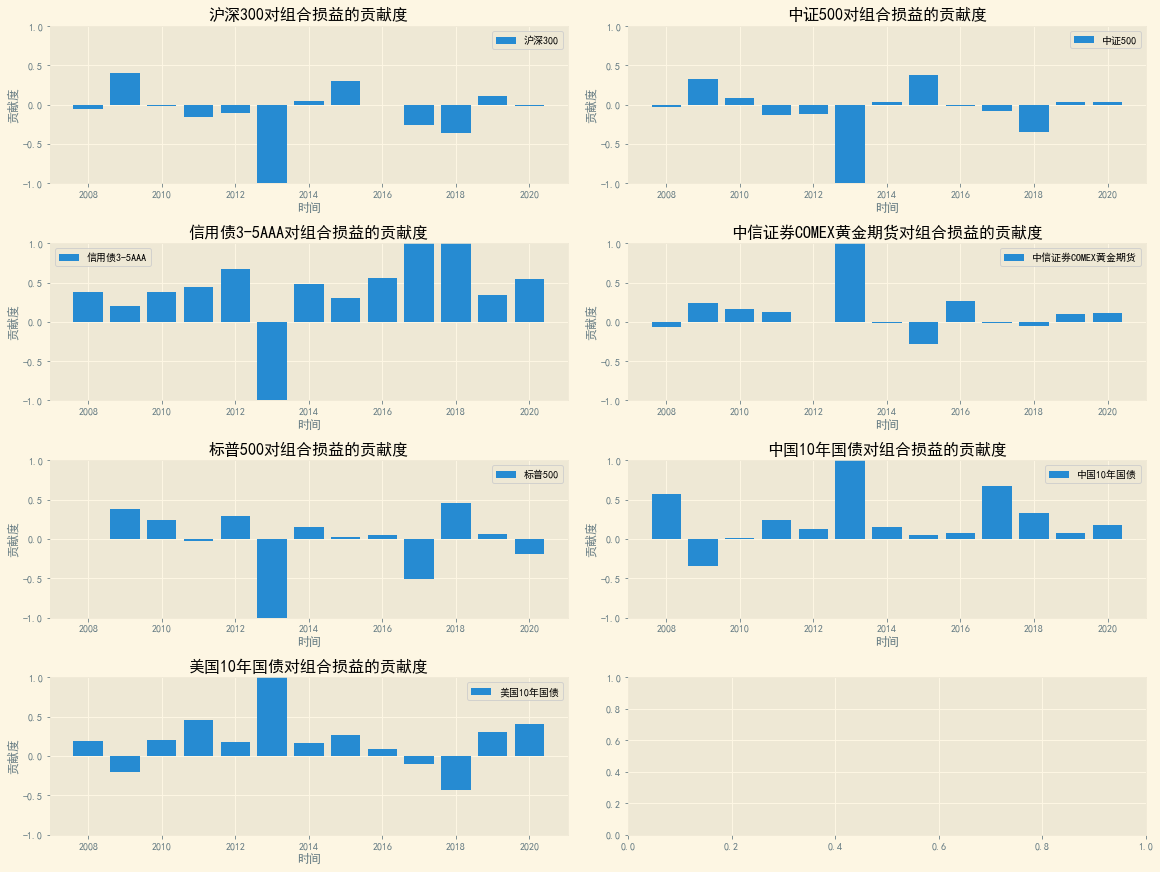

In [54]:
StatisticFunc.BarPlot(annualContrb_4, '铜金比D')

### 投资组合净值曲线

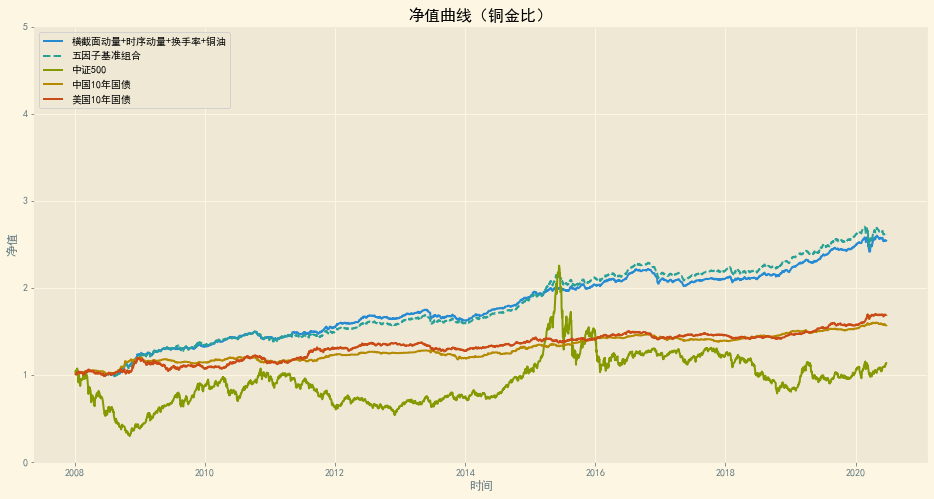

In [67]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_4.index, tradeDF_4['投资组合净值']/10000, label='横截面动量+时序动量+换手率+铜油')
    
    
# 基准参考
plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, ls='--', label='五因子基准组合')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（铜金比）')
plt.savefig('净值曲线（铜金比）D.png')

## 铜油

### 程序运行

In [56]:
thrds = {'Equity':0.50, 'FixedIncome':0.90, 'Commodity':0.30}
factors = {'momentumX':False, 'momentumT':False, 
            'reverseX':False, 'reverseT':False,
            'turnover':False, 
            'copperGold':False, 'copperGas':True}

tradeDF_5, weightDF_5 = AlgoLoop.AlgoTrade(Assets, leverReturns, leverCumReturns, Turnovers, mode='ema', 
                                       dt=120, up=0.50, thresholds=thrds, factorDict=factors)

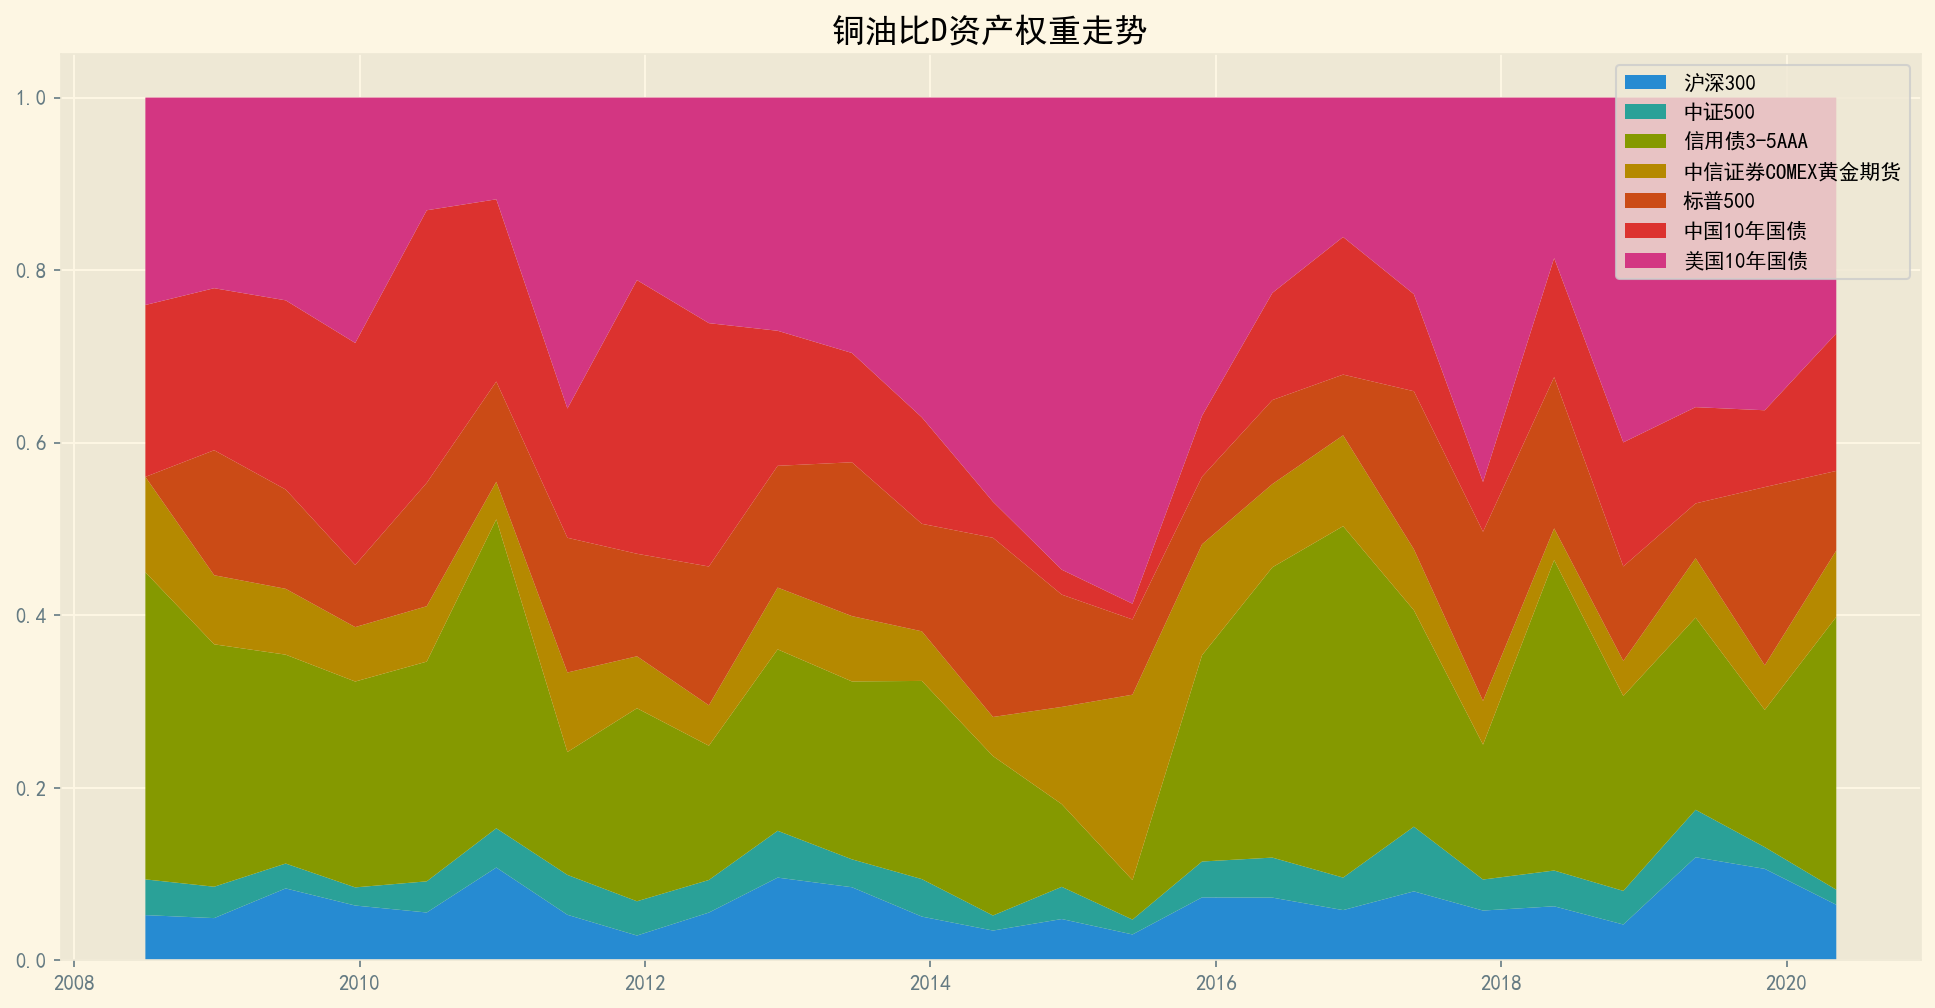

In [57]:
StatisticFunc.WeightPlot(tradeDF_5, weightDF_5, '铜油比D')

### 回测表现汇总

In [58]:
# 表现汇总
years = np.unique(tradeDF_5.reset_index()['日期'].apply(lambda x:str(x)[:4])) 

SummaryDF_5 = pd.DataFrame(index=years)

SummaryDF_5["年收益率"] = StatisticFunc.AnnualReturns( pd.DataFrame(tradeDF_5['投资组合净值']) )
SummaryDF_5["年波动率"] = StatisticFunc.AnnualVolatility(pd.DataFrame(tradeDF_5['投资组合净值'])).values
SummaryDF_5["无基准夏普比率"] = SummaryDF_5['年收益率'] / SummaryDF_5['年波动率']
SummaryDF_5["最大回撤"] = StatisticFunc.AnnualMaxDrawdown(pd.DataFrame(tradeDF_5['最大回撤'])).values

SummaryDF_5

,年收益率,年波动率,无基准夏普比率,最大回撤
2008,0.219918,0.101107,2.17511,-0.041192
2009,0.0857751,0.072274,1.18681,-0.037435
2010,0.0763904,0.052269,1.46148,-0.058429
2011,0.0681067,0.061970,1.09903,-0.066824
2012,0.0710091,0.035781,1.98455,-0.025340
2013,-0.0272223,0.051469,-0.528909,-0.075205
2014,0.164408,0.029417,5.58893,-0.078004
2015,0.0800276,0.050943,1.57093,-0.032685
2016,0.0213969,0.042106,0.508173,-0.072650
2017,0.021183,0.027680,0.765275,-0.080007


### 收益率贡献度

In [59]:
annualContrb_5 = StatisticFunc.AnnualContribution(tradeDF=tradeDF_5, weightDF=weightDF_5, assetDF=leverCumReturns)

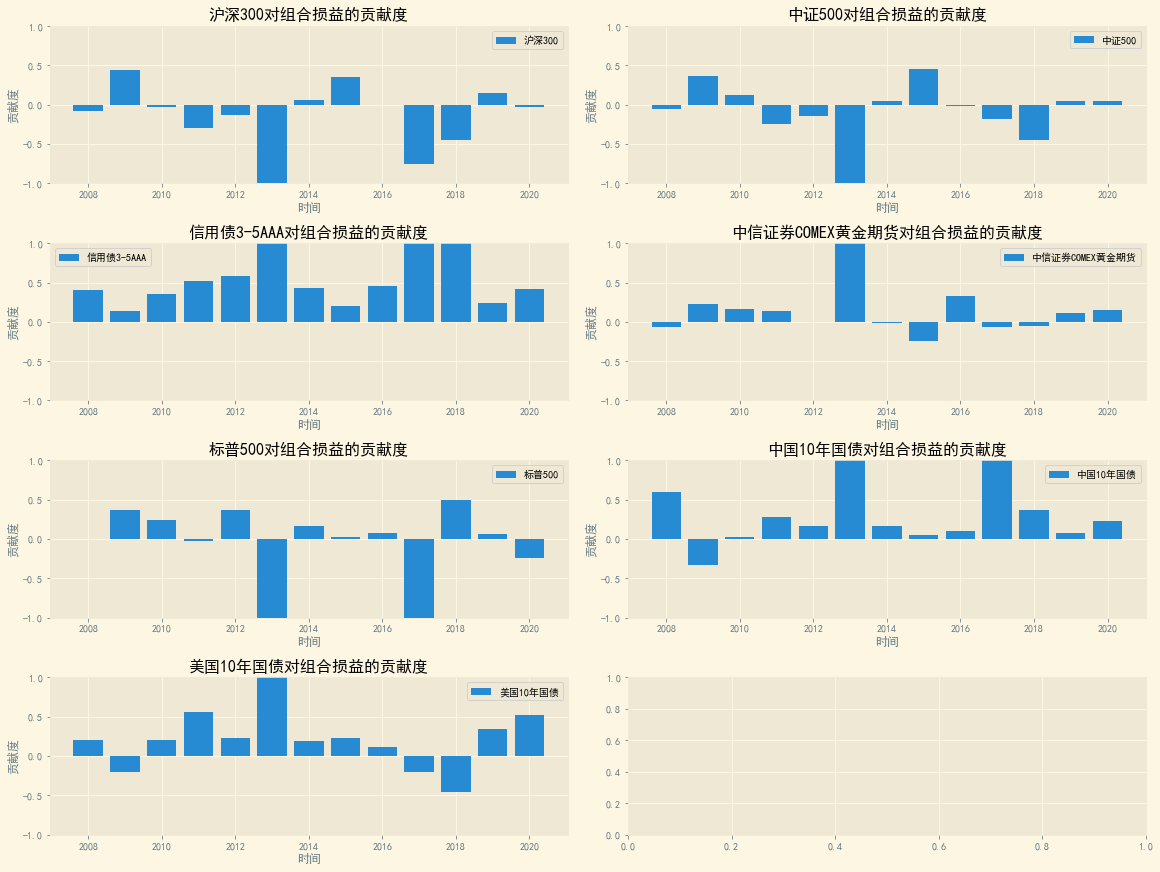

In [60]:
StatisticFunc.BarPlot(annualContrb_5, '铜油比D')

### 投资组合净值曲线

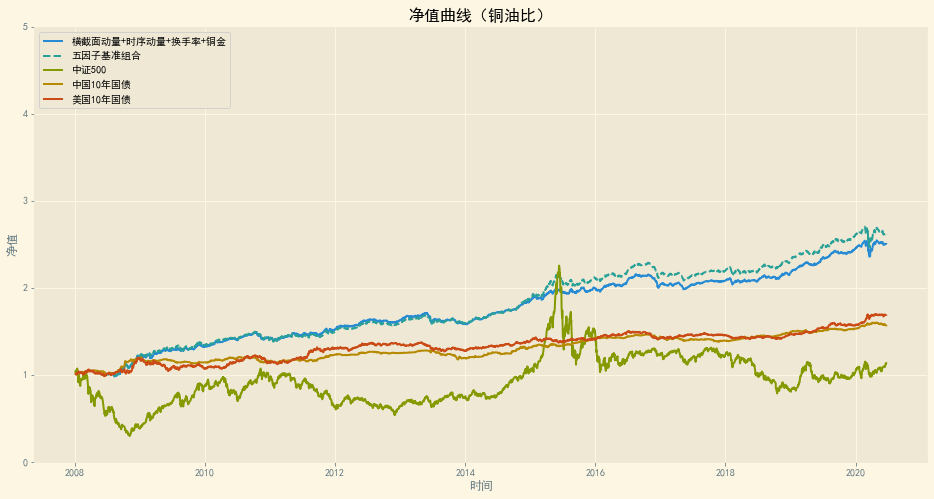

In [68]:
fig = plt.figure(figsize=(16, 8))

plt.plot(tradeDF_5.index, tradeDF_5['投资组合净值']/10000, label='横截面动量+时序动量+换手率+铜金')

# 基准参考
plt.plot(tradeDF_multi.index, tradeDF_multi['投资组合净值']/10000, ls='--', label='五因子基准组合')  
plt.plot(cumReturns.index, cumReturns['中证500'], label='中证500')
plt.plot(cumReturns.index, cumReturns['中国10年国债'], label='中国10年国债')
plt.plot(cumReturns.index, cumReturns['美国10年国债'], label='美国10年国债')

plt.xlabel('时间')
plt.ylabel('净值')
plt.ylim(0.0, 5.0)
plt.legend(loc='upper left')
plt.title('净值曲线（铜油比）')
plt.savefig('净值曲线（铜油比)D.png')

# 汇总比较

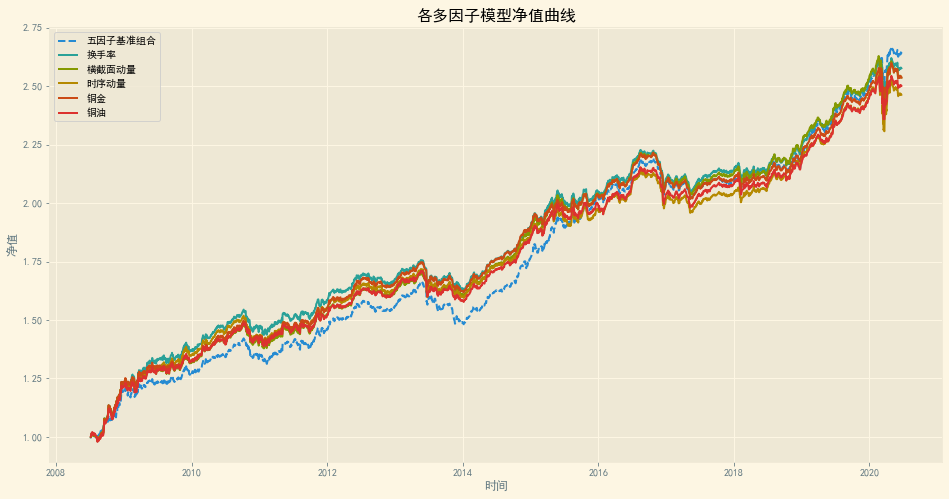

In [62]:
fig = plt.figure(figsize=(16, 8))


plt.plot(tradeDF.index, tradeDF['投资组合净值']/10000, ls='--', label='五因子基准组合')

plt.plot(tradeDF_1.index, tradeDF_1['投资组合净值']/10000, label='换手率')
plt.plot(tradeDF_2.index, tradeDF_2['投资组合净值']/10000, label='横截面动量')
plt.plot(tradeDF_3.index, tradeDF_3['投资组合净值']/10000, label='时序动量')
plt.plot(tradeDF_5.index, tradeDF_4['投资组合净值']/10000, label='铜金')
plt.plot(tradeDF_5.index, tradeDF_5['投资组合净值']/10000, label='铜油')


plt.xlabel('时间')
plt.ylabel('净值')
plt.legend(loc='upper left')
plt.title('各多因子模型净值曲线')
plt.savefig('各多因子模型净值曲线D.png')